In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip /content/drive/MyDrive/Memotion3/trainImages.zip

Streaming output truncated to the last 5000 lines.
file #5752 (trainImages/5301.jpg):
         mismatch between local and central GPF bit 11 ("UTF-8"),
         continuing with central flag (IsUTF8 = 1)
  inflating: trainImages/5301.jpg    
file #5753 (trainImages/3770.jpg):
         mismatch between local and central GPF bit 11 ("UTF-8"),
         continuing with central flag (IsUTF8 = 1)
  inflating: trainImages/3770.jpg    
file #5754 (trainImages/5315.jpg):
         mismatch between local and central GPF bit 11 ("UTF-8"),
         continuing with central flag (IsUTF8 = 1)
  inflating: trainImages/5315.jpg    
file #5755 (trainImages/3764.jpg):
         mismatch between local and central GPF bit 11 ("UTF-8"),
         continuing with central flag (IsUTF8 = 1)
  inflating: trainImages/3764.jpg    
file #5756 (trainImages/1173.jpg):
         mismatch between local and central GPF bit 11 ("UTF-8"),
         continuing with central flag (IsUTF8 = 1)
  inflating: trainImages/1173.jpg    

In [4]:
!unzip /content/drive/MyDrive/Memotion3/valImages.zip

Archive:  /content/drive/MyDrive/Memotion3/valImages.zip
replace valImages/802.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: valImages/802.jpg       
  inflating: valImages/506.jpg       
  inflating: valImages/882.jpg       
  inflating: valImages/279.jpg       
  inflating: valImages/1297.jpg      
  inflating: valImages/1002.jpg      
  inflating: valImages/49.jpg        
  inflating: valImages/359.jpg       
  inflating: valImages/1455.jpg      
  inflating: valImages/1025.jpg      
  inflating: valImages/580.jpg       
  inflating: valImages/210.jpg       
  inflating: valImages/371.jpg       
  inflating: valImages/563.jpg       
  inflating: valImages/375.jpg       
  inflating: valImages/445.jpg       
  inflating: valImages/969.jpg       
  inflating: valImages/993.jpg       
  inflating: valImages/177.jpg       
  inflating: valImages/342.jpg       
  inflating: valImages/155.jpg       
  inflating: valImages/400.jpg       
  inflating: valImages/16.jpg        
  

In [5]:
!unzip /content/drive/MyDrive/Memotion3/testImages.zip

Archive:  /content/drive/MyDrive/Memotion3/testImages.zip
replace testImages/802.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: testImages/802.jpg      
  inflating: testImages/506.jpg      
  inflating: testImages/882.jpg      
  inflating: testImages/279.jpg      
  inflating: testImages/1297.jpg     
  inflating: testImages/1002.jpg     
  inflating: testImages/49.jpg       
  inflating: testImages/359.jpg      
  inflating: testImages/1455.jpg     
  inflating: testImages/1025.jpg     
  inflating: testImages/580.jpg      
  inflating: testImages/210.jpg      
  inflating: testImages/371.jpg      
  inflating: testImages/563.jpg      
  inflating: testImages/375.jpg      
  inflating: testImages/445.jpg      
  inflating: testImages/969.jpg      
  inflating: testImages/993.jpg      
  inflating: testImages/177.jpg      
  inflating: testImages/342.jpg      
  inflating: testImages/155.jpg      
  inflating: testImages/400.jpg      
  inflating: testImages/16.jpg       


In [6]:
path = "/content/drive/MyDrive/Memotion3/"

In [7]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import os

In [8]:
import os
import shutil


dirpath= '/content/drive/MyDrive/Memotion3/alldata/model-checkpoint1'
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

In [9]:
import pandas as pd

train_data = pd.read_csv(path+'train.csv')
train_data.head()

,Unnamed: 0,image_url,humour,sarcastic,offensive,motivational,overall,ocr
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,twisted_meaning,not_offensive,not_motivational,neutral,Relationship status.\nSingle\nMarried\nIt's co...
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,twisted_meaning,slight,not_motivational,neutral,Bernie or REAGAN?\nBe informed. Compare them o...
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,not_offensive,not_motivational,positive,I HEAR SOMETHING\nBetter run a mile\nOMG RAJ?\...
3,3,https://preview.redd.it/iwcz3o2niix61.jpg?widt...,very_funny,twisted_meaning,not_offensive,not_motivational,positive,Redditors Visiting IG memepages\n*dies from cr...
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,not_funny,not_sarcastic,very_offensive,not_motivational,negative,"Samajh nahi aaya Par sun ke acabo,\nBUDGET SPE..."


In [10]:
hate_categories = ['offensive', 'very_offensive', 'slight','hateful_offensive'] # Adjust based on your file's values
non_hate_categories = ['not_offensive'] # Adjust based on your file's values

# Create the new 'is_hate' column
train_data['label'] = train_data['offensive'].apply(
    lambda x: 1 if x in hate_categories else (0 if x in non_hate_categories else None)
)

# You might want to handle 'None' values if there are categories you don't map
# For example, drop rows with None or assign them to 'non-hate' or 'hate' based on your criteria.

print(train_data[['offensive', 'label']].head(10))

           offensive  label
0      not_offensive      0
1             slight      1
2      not_offensive      0
3      not_offensive      0
4     very_offensive      1
5      not_offensive      0
6      not_offensive      0
7  hateful_offensive      1
8      not_offensive      0
9             slight      1


In [11]:
train_data.label.value_counts()

,count
label,
0,4264
1,2736


In [12]:
train_data.isnull().sum()

,0
Unnamed: 0,0
image_url,0
humour,0
sarcastic,0
offensive,0
motivational,0
overall,0
ocr,0
label,0


In [13]:
train_data.columns

Index(['Unnamed: 0', 'image_url', 'humour', 'sarcastic', 'offensive',
       'motivational', 'overall', 'ocr', 'label'],
      dtype='object')

In [14]:
train_data['text_len'] = train_data['ocr'].str.split().str.len()
train_data['text_len'].describe()

,text_len
count,7000.000000
mean,18.881857
std,13.029653
min,0.000000
25%,11.000000
50%,16.000000
75%,23.000000
max,172.000000


In [15]:
train_data.rename(columns={"Unnamed: 0": "id"}, inplace=True)
train_data.columns

Index(['id', 'image_url', 'humour', 'sarcastic', 'offensive', 'motivational',
       'overall', 'ocr', 'label', 'text_len'],
      dtype='object')

In [16]:
test_data = pd.read_csv(path+'test.csv')
test_data.head()

,Unnamed: 0,image_url,ocr
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,#Lockdown4\nmakatteun\nbura lagega but there n...
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,पोस्ट करने वाले\n@alayarwt\nCOBAROK\nHUME KOI ...
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,Girlfriend\nFacebook\nMe\nPubg\nMemes\nInsta\n...
3,3,https://encrypted-tbn0.gstatic.com/images?q=tb...,TELL THEM THEY CAN OPEN P\nMERS ARENALDEN\nE\n...
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,What about my Media attention\npapa?\nAa gaye ...


In [17]:
test_data.isnull().sum()

,0
Unnamed: 0,0
image_url,0
ocr,0


In [18]:
test_data.rename(columns={"Unnamed: 0": "id"}, inplace=True)
test_data.columns

Index(['id', 'image_url', 'ocr'], dtype='object')

In [19]:
val_data = pd.read_csv(path + 'val.csv', sep='\t', on_bad_lines='skip')
print(val_data.head())
print(val_data.columns)

   Unnamed: 0                                          image_url      humour  \
0           0  https://encrypted-tbn0.gstatic.com/images?q=tb...       funny   
1           1  https://encrypted-tbn0.gstatic.com/images?q=tb...  very_funny   
2           2  https://encrypted-tbn0.gstatic.com/images?q=tb...       funny   
3           3  https://encrypted-tbn0.gstatic.com/images?q=tb...       funny   
4           4  https://encrypted-tbn0.gstatic.com/images?q=tb...  very_funny   

         sarcastic      offensive      motivational        overall  \
0  twisted_meaning  not_offensive  not_motivational        neutral   
1          general         slight  not_motivational       negative   
2          general         slight  not_motivational  very_negative   
3          general         slight  not_motivational       negative   
4          general         slight  not_motivational        neutral   

                                                 ocr  
0  RVCJ\nwww.EVCI.COM\nTum paas aaye yun mu

In [20]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1500 non-null   int64 
 1   image_url     1500 non-null   object
 2   humour        1500 non-null   object
 3   sarcastic     1500 non-null   object
 4   offensive     1500 non-null   object
 5   motivational  1500 non-null   object
 6   overall       1500 non-null   object
 7   ocr           1500 non-null   object
dtypes: int64(1), object(7)
memory usage: 93.9+ KB


In [21]:
hate_categories = ['offensive', 'very_offensive', 'slight','hateful_offensive'] # Adjust based on your file's values
non_hate_categories = ['not_offensive'] # Adjust based on your file's values

# Create the new 'is_hate' column
val_data['label'] = val_data['offensive'].apply(
    lambda y: 1 if y in hate_categories else (0 if y in non_hate_categories else None)
)

# You might want to handle 'None' values if there are categories you don't map
# For example, drop rows with None or assign them to 'non-hate' or 'hate' based on your criteria.

print(val_data[['offensive', 'label']].head(10))

       offensive  label
0  not_offensive      0
1         slight      1
2         slight      1
3         slight      1
4         slight      1
5  not_offensive      0
6  not_offensive      0
7  not_offensive      0
8         slight      1
9  not_offensive      0


In [22]:
val_data.columns

Index(['Unnamed: 0', 'image_url', 'humour', 'sarcastic', 'offensive',
       'motivational', 'overall', 'ocr', 'label'],
      dtype='object')

In [23]:
val_data.rename(columns={"Unnamed: 0": "id"}, inplace=True)
val_data.columns

Index(['id', 'image_url', 'humour', 'sarcastic', 'offensive', 'motivational',
       'overall', 'ocr', 'label'],
      dtype='object')

In [24]:
val_data.label.value_counts()

,count
label,
1,859
0,641


In [25]:
train_data.shape, val_data.shape, test_data.shape

((7000, 10), (1500, 9), (1500, 3))

In [26]:
import re

def clean_ocr(text):
    if not isinstance(text, str):
        return ""

    # Remove URLs (http, https, www)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove newlines and carriage returns
    text = text.replace('\n', ' ').replace('\r', ' ')

    # Collapse multiple spaces
    text = re.sub(r'\s+', ' ', text)

    # Remove unwanted symbols, keep basic punctuation
    text = re.sub(r'[^\w\s.,!?\'"]', '', text)

    return text.strip()


# Apply to train_data
train_data['ocr'] = train_data['ocr'].apply(clean_ocr)
val_data['ocr'] = val_data['ocr'].apply(clean_ocr)
test_data['ocr'] = test_data['ocr'].apply(clean_ocr)

In [27]:
train_data.head()

,id,image_url,humour,sarcastic,offensive,motivational,overall,ocr,label,text_len
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,twisted_meaning,not_offensive,not_motivational,neutral,Relationship status. Single Married It's compl...,0,11
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,twisted_meaning,slight,not_motivational,neutral,Bernie or REAGAN? Be informed. Compare them on...,1,18
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,not_offensive,not_motivational,positive,I HEAR SOMETHING Better run a mile OMG RAJ? I ...,0,22
3,3,https://preview.redd.it/iwcz3o2niix61.jpg?widt...,very_funny,twisted_meaning,not_offensive,not_motivational,positive,Redditors Visiting IG memepages dies from crin...,0,10
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,not_funny,not_sarcastic,very_offensive,not_motivational,negative,"Samajh nahi aaya Par sun ke acabo, BUDGET SPEE...",1,11


In [28]:
val_data.head()

,id,image_url,humour,sarcastic,offensive,motivational,overall,ocr,label
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,twisted_meaning,not_offensive,not_motivational,neutral,RVCJ Tum paas aaye yun muskuraye BETA PHIR BHI...,0
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,general,slight,not_motivational,negative,"rukjao Maqbeol, babuji ko tum nalt muaracay hu...",1
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,slight,not_motivational,very_negative,champak appreciating Jetha for following lockd...,1
3,3,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,slight,not_motivational,negative,Noor MalikItsNoor 22h When you realize k Na ca...,1
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,general,slight,not_motivational,neutral,noop αποταθεωρία Nehe ita gis having 5 boyfhen...,1


In [29]:
test_data.head()

,id,image_url,ocr
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,Lockdown4 makatteun bura lagega but there noth...
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,पसट करन वल alayarwt COBAROK HUME KOI AISA EMPL...
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,Girlfriend Facebook Me Pubg Memes Insta rm bei...
3,3,https://encrypted-tbn0.gstatic.com/images?q=tb...,TELL THEM THEY CAN OPEN P MERS ARENALDEN E STA...
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,What about my Media attention papa? Aa gaye co...


In [30]:
import os

image_folder = '/content/drive/MyDrive/Memotion3/trainImages'

# Filter to rows with non-empty OCR and existing image
valid_rows = []
for idx, row in train_data.iterrows():
    ocr_text = str(row.get('ocr', '')).strip()
    image_name = f"{row['id']}.jpg"
    image_path = os.path.join(image_folder, image_name)

    if ocr_text and os.path.exists(image_path):
        valid_rows.append(row)

# Create new DataFrame with only valid rows
train_data_cleaned = pd.DataFrame(valid_rows).reset_index(drop=True)

print(f"✅ Filtered validation data: {len(train_data_cleaned)} rows retained from {len(train_data)}")


✅ Filtered validation data: 6961 rows retained from 7000


In [31]:
train_data = train_data_cleaned.reset_index(drop=True).copy()
train_data

,id,image_url,humour,sarcastic,offensive,motivational,overall,ocr,label,text_len
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,twisted_meaning,not_offensive,not_motivational,neutral,Relationship status. Single Married It's compl...,0,11
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,twisted_meaning,slight,not_motivational,neutral,Bernie or REAGAN? Be informed. Compare them on...,1,18
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,not_offensive,not_motivational,positive,I HEAR SOMETHING Better run a mile OMG RAJ? I ...,0,22
3,3,https://preview.redd.it/iwcz3o2niix61.jpg?widt...,very_funny,twisted_meaning,not_offensive,not_motivational,positive,Redditors Visiting IG memepages dies from crin...,0,10
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,not_funny,not_sarcastic,very_offensive,not_motivational,negative,"Samajh nahi aaya Par sun ke acabo, BUDGET SPEE...",1,11
...,...,...,...,...,...,...,...,...,...,...
6956,6995,https://preview.redd.it/3c7iiijlg9d61.jpg?widt...,hilarious,general,slight,not_motivational,negative,14 yo nibbi 16 yo nibba 20 yo single me,1,10
6957,6996,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,very_twisted,hateful_offensive,not_motivational,negative,I DON'T HAVE A PROBLEM WITH IMMIGRATION IF WE'...,1,12
6958,6997,https://encrypted-tbn0.gstatic.com/images?q=tb...,hilarious,not_sarcastic,not_offensive,not_motivational,positive,"Como umbalin Hey Alia, What is the Opposite of...",0,15
6959,6998,https://encrypted-tbn0.gstatic.com/images?q=tb...,hilarious,general,very_offensive,motivational,negative,baby kya kr rhe ho? tumhara favorite football ...,1,28


In [32]:
import os

image_folder = '/content/drive/MyDrive/Memotion3/valImages'

# Filter to rows with non-empty OCR and existing image
valid_rows = []
for idx, row in val_data.iterrows():
    ocr_text = str(row.get('ocr', '')).strip()
    image_name = f"{row['id']}.jpg"
    image_path = os.path.join(image_folder, image_name)

    if ocr_text and os.path.exists(image_path):
        valid_rows.append(row)

# Create new DataFrame with only valid rows
val_data_cleaned = pd.DataFrame(valid_rows).reset_index(drop=True)

print(f"✅ Filtered validation data: {len(val_data_cleaned)} rows retained from {len(val_data)}")


✅ Filtered validation data: 1481 rows retained from 1500


In [33]:
val_data = val_data_cleaned.reset_index(drop=True).copy()
val_data

,id,image_url,humour,sarcastic,offensive,motivational,overall,ocr,label
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,twisted_meaning,not_offensive,not_motivational,neutral,RVCJ Tum paas aaye yun muskuraye BETA PHIR BHI...,0
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,general,slight,not_motivational,negative,"rukjao Maqbeol, babuji ko tum nalt muaracay hu...",1
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,slight,not_motivational,very_negative,champak appreciating Jetha for following lockd...,1
3,3,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,slight,not_motivational,negative,Noor MalikItsNoor 22h When you realize k Na ca...,1
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,general,slight,not_motivational,neutral,noop αποταθεωρία Nehe ita gis having 5 boyfhen...,1
...,...,...,...,...,...,...,...,...,...
1476,1495,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,twisted_meaning,not_offensive,not_motivational,neutral,"CHALATA HOON MAIN WAGONR ABKI BAAR, MODI SARKA...",0
1477,1496,https://simg-memechat.s3.ap-south-1.amazonaws....,funny,general,not_offensive,not_motivational,neutral,Tourist visiting Afghanistan Terrorist welcomi...,0
1478,1497,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,slight,not_motivational,negative,"Pic 1 Lockdown khatam ho gya.. Ab PaniPuri, Pi...",1
1479,1498,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,not_offensive,not_motivational,positive,When you're from UPBihar and select English la...,0


In [34]:
import os

image_folder = '/content/drive/MyDrive/Memotion3/testImages'

# Filter to rows with non-empty OCR and existing image
valid_rows = []
for idx, row in test_data.iterrows():
    ocr_text = str(row.get('ocr', '')).strip()
    image_name = f"{row['id']}.jpg"
    image_path = os.path.join(image_folder, image_name)

    if ocr_text and os.path.exists(image_path):
        valid_rows.append(row)

# Create new DataFrame with only valid rows
test_data_cleaned = pd.DataFrame(valid_rows).reset_index(drop=True)

print(f"✅ Filtered validation data: {len(test_data_cleaned)} rows retained from {len(test_data)}")


✅ Filtered validation data: 1484 rows retained from 1500


In [35]:
test_data = test_data_cleaned.reset_index(drop=True).copy()
test_data

,id,image_url,ocr
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,Lockdown4 makatteun bura lagega but there noth...
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,पसट करन वल alayarwt COBAROK HUME KOI AISA EMPL...
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,Girlfriend Facebook Me Pubg Memes Insta rm bei...
3,3,https://encrypted-tbn0.gstatic.com/images?q=tb...,TELL THEM THEY CAN OPEN P MERS ARENALDEN E STA...
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,What about my Media attention papa? Aa gaye co...
...,...,...,...
1479,1495,https://encrypted-tbn0.gstatic.com/images?q=tb...,Aham Brahmasmi. NETFLIX
1480,1496,https://encrypted-tbn0.gstatic.com/images?q=tb...,SACRED GAMES ALLEGEDLY INSULTED EX PM RAJEEV G...
1481,1497,https://encrypted-tbn0.gstatic.com/images?q=tb...,"hp STUDIO R PVR REMAS The Sharma Gaitonde ""Bac..."
1482,1498,https://encrypted-tbn0.gstatic.com/images?q=tb...,am going to create an misunderstanding that is...


In [36]:
train_data.shape, val_data.shape, test_data.shape

((6961, 10), (1481, 9), (1484, 3))

### Univariate analysis

## Bivariate Analysis: Compare text length vs label:

### Multivariate Analysis

In [37]:
! pip install transformers
! pip install datasets
! pip install --upgrade tqdm

In [38]:
!pip install pytorch-lightning==2.5.1

In [39]:
import torch
print(torch.__version__)

2.6.0+cu124


In [40]:
train_data.label.value_counts()

,count
label,
0,4244
1,2717


In [41]:
val_data.label.value_counts()

,count
label,
1,847
0,634


### Compute Class Weight

## For all labels

In [42]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# Get labels
labels = train_data["label"].values

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(labels), y=labels)

# Convert to tensor for PyTorch
class_weights = torch.FloatTensor(class_weights)

print("Class weights:", class_weights)


Class weights: tensor([0.8201, 1.2810])


In [43]:
print(class_weights.shape)

torch.Size([2])


### Load Evaluation metrics

In [44]:
!pip install evaluate

In [45]:
from evaluate import list_evaluation_modules

metrics_list = list_evaluation_modules()
print(metrics_list)


['lvwerra/test', 'angelina-wang/directional_bias_amplification', 'cpllab/syntaxgym', 'lvwerra/bary_score', 'hack/test_metric', 'yzha/ctc_eval', 'codeparrot/apps_metric', 'mfumanelli/geometric_mean', 'daiyizheng/valid', 'erntkn/dice_coefficient', 'mgfrantz/roc_auc_macro', 'Vlasta/pr_auc', 'gorkaartola/metric_for_tp_fp_samples', 'idsedykh/metric', 'idsedykh/codebleu2', 'idsedykh/codebleu', 'idsedykh/megaglue', 'Vertaix/vendiscore', 'GMFTBY/dailydialogevaluate', 'GMFTBY/dailydialog_evaluate', 'jzm-mailchimp/joshs_second_test_metric', 'ola13/precision_at_k', 'yulong-me/yl_metric', 'abidlabs/mean_iou', 'abidlabs/mean_iou2', 'KevinSpaghetti/accuracyk', 'NimaBoscarino/weat', 'ronaldahmed/nwentfaithfulness', 'Viona/infolm', 'kyokote/my_metric2', 'kashif/mape', 'Ochiroo/rouge_mn', 'leslyarun/fbeta_score', 'anz2/iliauniiccocrevaluation', 'zbeloki/m2', 'xu1998hz/sescore', 'dvitel/codebleu', 'NCSOFT/harim_plus', 'JP-SystemsX/nDCG', 'sportlosos/sescore', 'Drunper/metrica_tesi', 'jpxkqx/peak_signal_

In [46]:
import evaluate

# Load Precision, Recall, F1-score
acc_metric = evaluate.load("accuracy")
precision = evaluate.load("precision")
recall = evaluate.load("recall")
f1 = evaluate.load("f1")
print(precision, recall, f1)


EvaluationModule(name: "precision", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted class labels.
    references (`list` of `int`): Actual class labels.
    labels (`list` of `int`): The set of labels to include when `average` is not set to `'binary'`. If `average` is `None`, it should be the label order. Labels present in the data can be excluded, for example to calculate a multiclass average ignoring a majority negative class. Labels not present in the data will result in 0 components in a macro average. For multilabel targets, labels are column indices. By default, all labels in `predictions` and `references` are used in sorted order. Defaults to None.
    pos_label (`int`): The class to be considered the positive class, in the case where `average` is set to `binary`. Defaults to 1.
    average (`string`): This parameter is required for multicla

### Intialise tokeniser function

In [47]:
from transformers import BertTokenizer, VisualBertForPreTraining, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

### Load Visual Embedding features

In [48]:
import torch
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image

In [49]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
feature_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k').to('cuda')

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [50]:
from transformers import ViTModel, ViTImageProcessor

image_processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')
feature_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k').to('cuda')
#feature_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

## Hateful Memes dataset function

### Added fr testing the below block

In [96]:
from torch.utils.data import Dataset
from PIL import Image
import os
import torch

class HatefulMemesData(Dataset):
    #def __init__(self, df, tokenizer, sequence_length, feature_extractor, feature_model, image_root, device='cuda'):
    def __init__(self, df, tokenizer, sequence_length, feature_extractor, feature_model, image_root, device='cuda'):
        self.tokenizer = tokenizer
        self.sequence_length = sequence_length
        self.feature_extractor = feature_extractor  # This should be ViTImageProcessor
        #self.feature_extractor = image_processor
        self.feature_model = feature_model
        self.image_root = image_root
        self.device = device

        self.dataset = []
        for i, row in df.iterrows():
            self.dataset.append({
                "text": row["ocr"],
                "label": row["label"] if "label" in df.columns and not pd.isna(row.get("label", None)) else None,
                "idx": row.get("id", i),
                "image": row["image"]
            })

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        example = self.dataset[index]

        # Tokenize text
        encoded = self.tokenizer(
            example["text"],
            padding="max_length",
            max_length=self.sequence_length,
            truncation=True,
            return_tensors="pt"
        )
        input_ids = encoded["input_ids"].squeeze(0)
        attention_mask = encoded["attention_mask"].squeeze(0)
        # Ensure token_type_ids is 1D (remove batch dimension if present)
        token_type_ids = encoded.get("token_type_ids", torch.zeros_like(input_ids))
        if token_type_ids.ndim > 1:
            token_type_ids = token_type_ids.squeeze(0)


        # Process image
        #image_path = os.path.join(self.image_root, os.path.basename(example["image"]))
        image_path = os.path.join(self.image_root, example["image"])  # filenames like '0.jpg'
        if not os.path.exists(image_path):
          print(f"[{example['idx']}] Missing file: {image_path}")


        try:
            image = Image.open(image_path).convert("RGB")
            inputs = self.feature_extractor(images=image, return_tensors="pt").to(self.device)
            #inputs = self.feature_extractor(images=image, return_tensors="pt")

            with torch.no_grad():
                outputs = self.feature_model(**inputs)

            # Remove the extra dimension of size 1 here
            visual_embeds = outputs.last_hidden_state.squeeze(0).cpu()
        except Exception as e:
            # Create a tensor with the correct shape for a single sample (2D)
            visual_embeds = torch.zeros((197, 768), dtype=torch.float32)
            print(f"[{example['idx']}] image load failed — using zeros. Error: {e}")


        # Visual token formatting - Ensure 2D shape (num_image_patches, )
        visual_attention_mask = torch.ones(visual_embeds.shape[0], dtype=torch.int64)
        visual_token_type_ids = torch.ones(visual_embeds.shape[0], dtype=torch.int64)


        # Prepare output dict
        output = {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "token_type_ids": token_type_ids,
            "visual_embeds": visual_embeds,
            "visual_attention_mask": visual_attention_mask,
            "visual_token_type_ids": visual_token_type_ids,
            #"text": example["text"],
            #"image_id": example["idx"]
        }

        if example["label"] is not None:
            output["labels"] = torch.tensor(example["label"]).long()

        return output

In [97]:
import pandas as pd

# Step 1: Load your DataFrame
#train_data = pd.read_csv("/content/drive/MyDrive/Memotion3/train.csv")  # or however you're loading it

# Step 2: Fix the 'image' column to use local filenames
train_data['image'] = train_data.index.astype(str) + '.jpg'

# Step 3: Instantiate your dataset with the corrected DataFrame
train_dataset = HatefulMemesData(
    df=train_data,
    tokenizer=tokenizer,
    sequence_length=128,
    feature_extractor=image_processor,
    feature_model=feature_model,
    image_root="/content/drive/MyDrive/Memotion3/trainImages",
    device='cuda'
)



In [98]:
def check_feature_scales(dataloader, max_batches=1):
    print("\n📏 Checking input feature magnitudes for first few batches...")
    for batch in dataloader:
        text_feats = batch['input_ids'].float()              # or 'input_embeds' if pre-embedded
        img_feats = batch['visual_embeds'].float()
        print(f"Text features: mean={text_feats.mean():.4f}, std={text_feats.std():.4f}")
        print(f"Image features: mean={img_feats.mean():.4f}, std={img_feats.std():.4f}")
        break


In [99]:
from torch.utils.data import DataLoader

val_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
batch = next(iter(val_loader))
img_feats = batch['visual_embeds']

print(f"Image embed shape of train data: {img_feats.shape}")
print(f"Mean: {img_feats.mean():.4f}, Std: {img_feats.std():.4f}")


Image embed shape of train data: torch.Size([8, 197, 768])
Mean: -0.0178, Std: 0.1910


In [100]:
import pandas as pd

# Step 1: Load your DataFrame
#val_data = pd.read_csv("/content/drive/MyDrive/Memotion3/val.csv")  # or however you're loading it

# Step 2: Fix the 'image' column to use local filenames
val_data['image'] = val_data.index.astype(str) + '.jpg'


val_dataset = HatefulMemesData(
    df=val_data,
    tokenizer=tokenizer,
    sequence_length=128,
    feature_extractor=image_processor,
    feature_model=feature_model,
    image_root="/content/drive/MyDrive/Memotion3/valImages",
    device='cuda',
)


In [101]:
val_data.head()

,id,image_url,humour,sarcastic,offensive,motivational,overall,ocr,label,image
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,twisted_meaning,not_offensive,not_motivational,neutral,RVCJ Tum paas aaye yun muskuraye BETA PHIR BHI...,0,0.jpg
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,general,slight,not_motivational,negative,"rukjao Maqbeol, babuji ko tum nalt muaracay hu...",1,1.jpg
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,slight,not_motivational,very_negative,champak appreciating Jetha for following lockd...,1,2.jpg
3,3,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,slight,not_motivational,negative,Noor MalikItsNoor 22h When you realize k Na ca...,1,3.jpg
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,general,slight,not_motivational,neutral,noop αποταθεωρία Nehe ita gis having 5 boyfhen...,1,4.jpg


In [102]:
from torch.utils.data import DataLoader

val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)
batch = next(iter(val_loader))
img_feats = batch['visual_embeds']

print(f"Image embed shape of val data: {img_feats.shape}")
print(f"Mean: {img_feats.mean():.4f}, Std: {img_feats.std():.4f}")


Image embed shape of val data: torch.Size([8, 197, 768])
Mean: -0.0175, Std: 0.1891


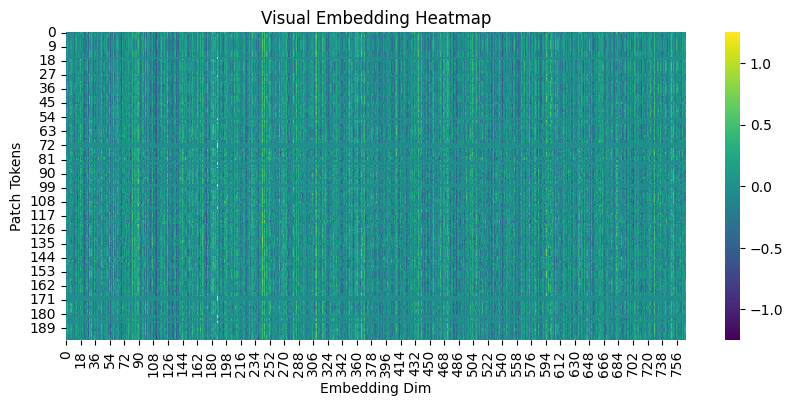

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

sample = batch['visual_embeds'][0].detach().numpy()
plt.figure(figsize=(10, 4))
sns.heatmap(sample, cmap="viridis")
plt.title("Visual Embedding Heatmap")
plt.xlabel("Embedding Dim")
plt.ylabel("Patch Tokens")
plt.show()


In [104]:
sample = train_dataset[0]
for k, v in sample.items():
    print(f"{k}: {v.shape if hasattr(v, 'shape') else v}")


input_ids: torch.Size([128])
attention_mask: torch.Size([128])
token_type_ids: torch.Size([128])
visual_embeds: torch.Size([197, 768])
visual_attention_mask: torch.Size([197])
visual_token_type_ids: torch.Size([197])
labels: torch.Size([])


### VisualBERT model

In [105]:
from transformers import BertTokenizer, VisualBertModel, TrainingArguments, Trainer, VisualBertConfig
configuration = VisualBertConfig.from_pretrained('uclanlp/visualbert-nlvr2-coco-pre',
                                                hidden_dropout_prob=0.3, attention_probs_dropout_prob=0.3)
model = VisualBertModel.from_pretrained('uclanlp/visualbert-nlvr2-coco-pre', config=configuration)


## Pytorch Lightning

In [106]:
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning.loggers import WandbLogger        # I commented

import evaluate
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

from torch.optim import AdamW
from transformers import VisualBertModel, get_linear_schedule_with_warmup
import logging
import argparse
import time
from torch.nn import CrossEntropyLoss
from sklearn.metrics import roc_auc_score

In [107]:
import os
from pathlib import Path
from string import punctuation
import torch.nn as nn

In [108]:
print("Class weights:", class_weights)

Class weights: tensor([0.8201, 1.2810])


In [109]:
weights = [0.8208, 1.2792]
wt_tensor = torch.FloatTensor(weights)
print(wt_tensor)

tensor([0.8208, 1.2792])


## VisualBERT classifier

In [110]:
class VisualBERTClassifier(nn.Module):
    def __init__(self, class_weights, device='cuda'):
        super(VisualBERTClassifier, self).__init__()
        self.num_labels = 2

        configuration = VisualBertConfig.from_pretrained(
            'uclanlp/visualbert-nlvr2-coco-pre',
            hidden_dropout_prob=0.1,
            attention_probs_dropout_prob=0.1
        )
        self.visualbert = VisualBertModel.from_pretrained(
            'uclanlp/visualbert-nlvr2-coco-pre',
            config=configuration
        )

        self.visual_projector = nn.Linear(768, 1024)
        self.dropout = nn.Dropout(0.3)
        self.cls = nn.Linear(768 + 1024, self.num_labels)

        class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
        self.loss_fct = nn.CrossEntropyLoss(weight=class_weights_tensor)

    def forward(self, input_ids, attention_mask, token_type_ids,
                visual_embeds, visual_attention_mask, visual_token_type_ids, labels=None):
        # Removed debug print statements
        visual_embeds = self.visual_projector(visual_embeds)
        if visual_embeds.dim() == 3:
          visual_cls = visual_embeds[:, 0, :]
        elif visual_embeds.dim() == 2:
          visual_cls = visual_embeds
        else:
          raise ValueError(f"Unexpected visual_embeds shape: {visual_embeds.shape}")

        outputs = self.visualbert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            visual_embeds=visual_embeds,
            visual_attention_mask=visual_attention_mask,
            visual_token_type_ids=visual_token_type_ids
        )

        text_cls = outputs.pooler_output
        combined = torch.cat([text_cls, visual_cls], dim=1)
        combined = self.dropout(combined)
        # Removed debug print statement
        logits = self.cls(combined)

        if labels is not None:
            labels = labels.view(-1).long().to(logits.device)
            loss = self.loss_fct(logits, labels)
            return loss, logits
        else:
            return logits

In [111]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch
model = VisualBERTClassifier(class_weights=class_weights).to("cuda")

/tmp/ipython-input-110-380992950.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)


## Using HuggingFace Trainer

In [112]:
!pip install --upgrade accelerate


import accelerate
print(accelerate.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.1/367.1 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.8.1
    Uninstalling accelerate-1.8.1:
      Successfully uninstalled accelerate-1.8.1


KeyboardInterrupt: 

## for all samples batchsize=32

In [113]:
from transformers import TrainingArguments, Trainer
batch_size = 32
#seq_len = 50

In [114]:
model

VisualBERTClassifier(
  (visualbert): VisualBertModel(
    (embeddings): VisualBertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (visual_token_type_embeddings): Embedding(2, 768)
      (visual_position_embeddings): Embedding(512, 768)
      (visual_projection): Linear(in_features=1024, out_features=768, bias=True)
    )
    (encoder): VisualBertEncoder(
      (layer): ModuleList(
        (0-11): 12 x VisualBertLayer(
          (attention): VisualBertAttention(
            (self): VisualBertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            

## Training args

In [115]:
# Example setup (fill paths and data as needed)
batch_size = 32
metric_name = "auroc"

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Memotion3/alldata/model-checkpoint1",
    seed=110,
    eval_strategy="steps",
    eval_steps=50,
    learning_rate=1e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=15,
    weight_decay=0.05,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    save_steps=500,
    save_total_limit=2,
    gradient_accumulation_steps=2,
    fp16=False,
    logging_dir="/content/drive/MyDrive/Memotion3/alldata/logs",
    logging_steps=10,
    report_to="none"
)

In [116]:
import evaluate
import numpy as np
from transformers import TrainingArguments
from sklearn.metrics import roc_auc_score

accuracy = evaluate.load("accuracy")
precision = evaluate.load("precision")
recall = evaluate.load("recall")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred

    # Convert logits to probabilities
    probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)  # softmax

    # Get predicted class from logits
    preds = np.argmax(logits, axis=1)

    try:
        auc = roc_auc_score(labels, probs[:, 1])  # probs for class 1
    except:
        auc = 0.0

    return {
       "accuracy": accuracy.compute(references=labels, predictions=preds)["accuracy"],
       "precision": precision.compute(references=labels, predictions=preds)["precision"],
       "recall": recall.compute(references=labels, predictions=preds)["recall"],
       "f1": f1.compute(references=labels, predictions=preds)["f1"],
       "auroc": auc
       }

In [117]:
from transformers import Trainer, EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=HatefulMemesData(
        df=train_data,
        tokenizer=tokenizer,
        sequence_length=128,
        feature_extractor=feature_extractor,
        feature_model=feature_model,
        image_root="/content/drive/MyDrive/Memotion3/trainImages",  # ← comma here
    ),
    eval_dataset=HatefulMemesData(
        df=val_data,
        tokenizer=tokenizer,
        sequence_length=128,
        feature_extractor=feature_extractor,
        feature_model=feature_model,
        image_root="/content/drive/MyDrive/Memotion3/valImages",  # ← comma here
    ),
    compute_metrics=compute_metrics,
    #callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)


In [118]:
val_data

,id,image_url,humour,sarcastic,offensive,motivational,overall,ocr,label,image
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,twisted_meaning,not_offensive,not_motivational,neutral,RVCJ Tum paas aaye yun muskuraye BETA PHIR BHI...,0,0.jpg
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,general,slight,not_motivational,negative,"rukjao Maqbeol, babuji ko tum nalt muaracay hu...",1,1.jpg
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,slight,not_motivational,very_negative,champak appreciating Jetha for following lockd...,1,2.jpg
3,3,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,slight,not_motivational,negative,Noor MalikItsNoor 22h When you realize k Na ca...,1,3.jpg
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,general,slight,not_motivational,neutral,noop αποταθεωρία Nehe ita gis having 5 boyfhen...,1,4.jpg
...,...,...,...,...,...,...,...,...,...,...
1476,1495,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,twisted_meaning,not_offensive,not_motivational,neutral,"CHALATA HOON MAIN WAGONR ABKI BAAR, MODI SARKA...",0,1476.jpg
1477,1496,https://simg-memechat.s3.ap-south-1.amazonaws....,funny,general,not_offensive,not_motivational,neutral,Tourist visiting Afghanistan Terrorist welcomi...,0,1477.jpg
1478,1497,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,slight,not_motivational,negative,"Pic 1 Lockdown khatam ho gya.. Ab PaniPuri, Pi...",1,1478.jpg
1479,1498,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,not_offensive,not_motivational,positive,When you're from UPBihar and select English la...,0,1479.jpg


In [91]:
inputs = train_dataset[0]
# No need to manually unsqueeze as the dataset should now return
# tensors with a batch dimension of 1 for single samples.
for k, v in inputs.items():
    if isinstance(v, torch.Tensor):
        # Move to device for model testing
        inputs[k] = v.to("cuda")


with torch.no_grad():
    # Directly assign the output since labels are not provided and only logits are returned
    output = model(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        token_type_ids=inputs['token_type_ids'],
        visual_embeds=inputs['visual_embeds'],
        visual_attention_mask=inputs['visual_attention_mask'],
        visual_token_type_ids=inputs['visual_token_type_ids'],
        labels=None # Explicitly pass None for labels
    )

# Print shapes of inputs and output for debugging
print("Input Shapes:")
for k, v in inputs.items():
    if isinstance(v, torch.Tensor):
        print(f"{k}: {v.shape}")

print("\nOutput:")
if isinstance(output, tuple):
    for i, out in enumerate(output):
        print(f"Output {i}: {out.shape}")
else:
    print(f"Output: {output.shape}")

ValueError: not enough values to unpack (expected 2, got 1)

### Training begins here

In [ ]:
trainer.train(resume_from_checkpoint=False)

Step,Training Loss,Validation Loss


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Auroc
50,0.699100,0.684857,0.543552,0.575198,0.772137,0.659274,0.516143


In [ ]:
import numpy as np
eval_results =  trainer.evaluate()
eval_results

### Predictions on test.csv

In [ ]:
import pandas as pd

test_data.head(1)


In [ ]:
print(test_data.head())
print(test_data.columns)
print(test_data.index)


In [ ]:

test_data = test_data.reset_index(drop=True)


In [ ]:
test_dataset = HatefulMemesData(
    df=test_data,
    tokenizer=tokenizer,
    sequence_length=50,
    feature_extractor=feature_extractor,
    feature_model=feature_model,
    image_root="/content/drive/MyDrive/Memotion3/testImages",
    device='cuda'  # or 'cpu'
)


In [ ]:
from torch.utils.data import DataLoader

test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)
batch = next(iter(val_loader))
img_feats = batch['visual_embeds']

print(f"Image embed shape of test data: {img_feats.shape}")
print(f"Mean: {img_feats.mean():.4f}, Std: {img_feats.std():.4f}")


In [ ]:
from torch.utils.data import DataLoader

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
model.eval()


In [ ]:
all_preds = []
all_ids = []

with torch.no_grad():
    for batch in test_loader:
        # Move inputs to GPU
        input_ids = batch['input_ids'].to('cuda')
        attention_mask = batch['attention_mask'].to('cuda')
        token_type_ids = batch['token_type_ids'].to('cuda')
        visual_embeds = batch['visual_embeds'].to('cuda')
        visual_attention_mask = batch['visual_attention_mask'].to('cuda')
        visual_token_type_ids = batch['visual_token_type_ids'].to('cuda')

        # Forward pass
        logits = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            visual_embeds=visual_embeds,
            visual_attention_mask=visual_attention_mask,
            visual_token_type_ids=visual_token_type_ids,
            labels=None
        )

        probs = torch.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1).cpu().numpy()
        all_preds.extend(preds)


In [ ]:
test_data["predicted_label"] = all_preds
test_data.to_csv("test_predictions.csv", index=False)


In [ ]:
print(test_data[["id", "ocr", "predicted_label"]].head())
